<a href="https://colab.research.google.com/github/pri2k/Data-Mining-Lab/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 2: Data Preprocessing & Cleaning
Objective: Learn how to clean and prepare data for modeling.
Topics:
- Handle missing values.
- Scaling and normalization.
- Encoding categorical data.
- Detecting outliers.

Tasks:
- Use Wine Quality dataset.
- Handle missing/outlier data.
- Normalize, encode categorical columns.
- Post-preprocessing EDA.

In [22]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

In [15]:
# Download Wine Quality dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality
wine_red = pd.read_csv("/content/winequality-red.csv", sep=';')
wine_white = pd.read_csv("/content/winequality-white.csv", sep=';')

print("Initial Data Shape:", wine_red.shape)
print("Initial Data Shape:", wine_white.shape)
print(wine_red.head())
print(wine_white.head())

Initial Data Shape: (1599, 12)
Initial Data Shape: (4898, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0 

In [17]:
print("\nMissing Values:")
print(wine_red.isna().any().any())
print(wine_white.isna().any().any())


Missing Values:
False
False


In [18]:
wine_red['type'] = 0
wine_white['type'] = 1

In [19]:
wine = pd.concat([wine_red, wine_white], axis=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [20]:
wine.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [21]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [29]:
z_scores = stats.zscore(wine)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
print(filtered_entries)

wine_new = wine[filtered_entries]
print(wine.shape)
print(wine_new.shape)
# print(wine_new)

[ True False  True ...  True  True  True]
(6497, 13)
(5989, 13)


In [36]:
wine_new_rows = len(wine_new)
wine_rows = len(wine.index)

wine_reduction = wine_rows-wine_new_rows
wine_reduction_percent = (wine_reduction/wine_rows)*100

print(wine_reduction,"outliers have been removed from the wine_red dataset, which represents", round(wine_reduction_percent,2),"% of the original dataset." )

508 outliers have been removed from the wine_red dataset, which represents 7.82 % of the original dataset.


In [30]:
wine['quality'].value_counts().sort_index()

,count
quality,
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


In [31]:
wine_new['quality'].value_counts().sort_index()

,count
quality,
4,184
5,1958
6,2636
7,1027
8,184


In [32]:
wine_new.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.204046,0.242447,-0.090760,0.364424,-0.250571,-0.274014,0.407062,-0.221865,0.233203,-0.103256,-0.085213,-0.442849
volatile acidity,0.204046,1.000000,-0.430326,-0.197058,0.496519,-0.346565,-0.404227,0.247992,0.262876,0.224637,-0.039541,-0.242564,-0.655691
citric acid,0.242447,-0.430326,1.000000,0.165821,-0.136419,0.188659,0.259480,0.041760,-0.293830,-0.016885,-0.001722,0.082348,0.264488
residual sugar,-0.090760,-0.197058,0.165821,1.000000,-0.140055,0.436970,0.503755,0.583922,-0.279926,-0.169277,-0.389312,-0.043271,0.338436
chlorides,0.364424,0.496519,-0.136419,-0.140055,1.000000,-0.259136,-0.350782,0.484535,0.202127,0.325731,-0.318957,-0.249538,-0.684358
free sulfur dioxide,-0.250571,-0.346565,0.188659,0.436970,-0.259136,1.000000,0.718169,0.088629,-0.165620,-0.167453,-0.193071,0.070611,0.461297
total sulfur dioxide,-0.274014,-0.404227,0.259480,0.503755,-0.350782,0.718169,1.000000,0.098138,-0.259024,-0.255926,-0.288291,-0.046646,0.683218
density,0.407062,0.247992,0.041760,0.583922,0.484535,0.088629,0.098138,1.000000,0.051610,0.235882,-0.739544,-0.322905,-0.358738
pH,-0.221865,0.262876,-0.293830,-0.279926,0.202127,-0.165620,-0.259024,0.051610,1.000000,0.292439,0.091032,0.024722,-0.371684
sulphates,0.233203,0.224637,-0.016885,-0.169277,0.325731,-0.167453,-0.255926,0.235882,0.292439,1.000000,0.009271,0.051402,-0.464822


from matplotlib import pyplot as plt
_df_0['fixed acidity'].plot(kind='hist', bins=20, title='fixed acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['volatile acidity'].plot(kind='hist', bins=20, title='volatile acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['citric acid'].plot(kind='hist', bins=20, title='citric acid')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['residual sugar'].plot(kind='hist', bins=20, title='residual sugar')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='fixed acidity', y='volatile acidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='volatile acidity', y='citric acid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='citric acid', y='residual sugar', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='residual sugar', y='chlorides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['fixed acidity'].plot(kind='line', figsize=(8, 4), title='fixed acidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['volatile acidity'].plot(kind='line', figsize=(8, 4), title='volatile acidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['citric acid'].plot(kind='line', figsize=(8, 4), title='citric acid')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['residual sugar'].plot(kind='line', figsize=(8, 4), title='residual sugar')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

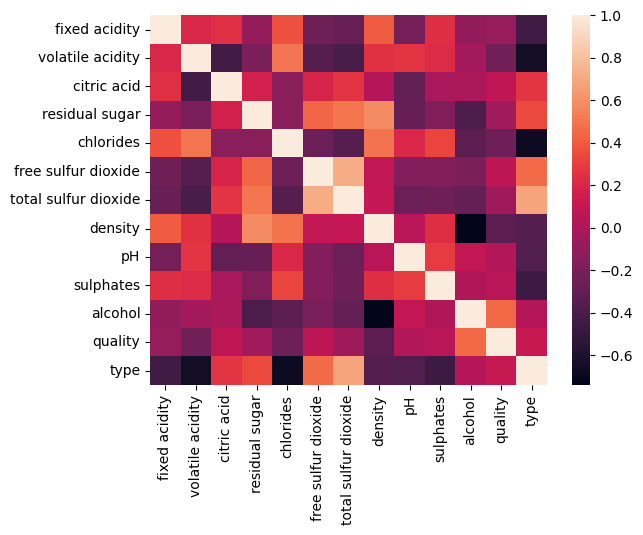

In [33]:
sns.heatmap(wine_new.corr())

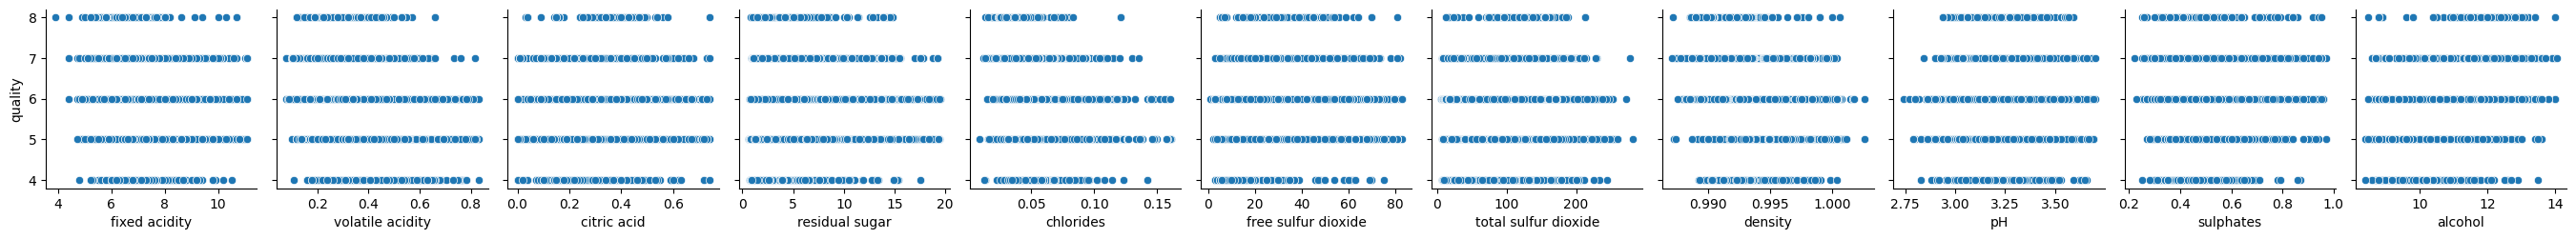

In [35]:
sns.pairplot(data=wine_new,
                  y_vars=['quality'],
                  x_vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                          'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])